In [1]:
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL

## Data Reading/Data Understanding

In [2]:
#Mount the google drive to access the dataset
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Skin_cancer/Train")

In [4]:
#see number of images in train and test dataset
image_count_train = len(list(data_dir_train.rglob('*/*.jpg')))
print(image_count_train)

2239


## `Dataset Creation`

In [5]:
#As per problem statement:Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
batch_size = 32
img_height = 180
img_width = 180

In [6]:
#Creating train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
#Creating validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
#See all classes present in dataset
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the dataset

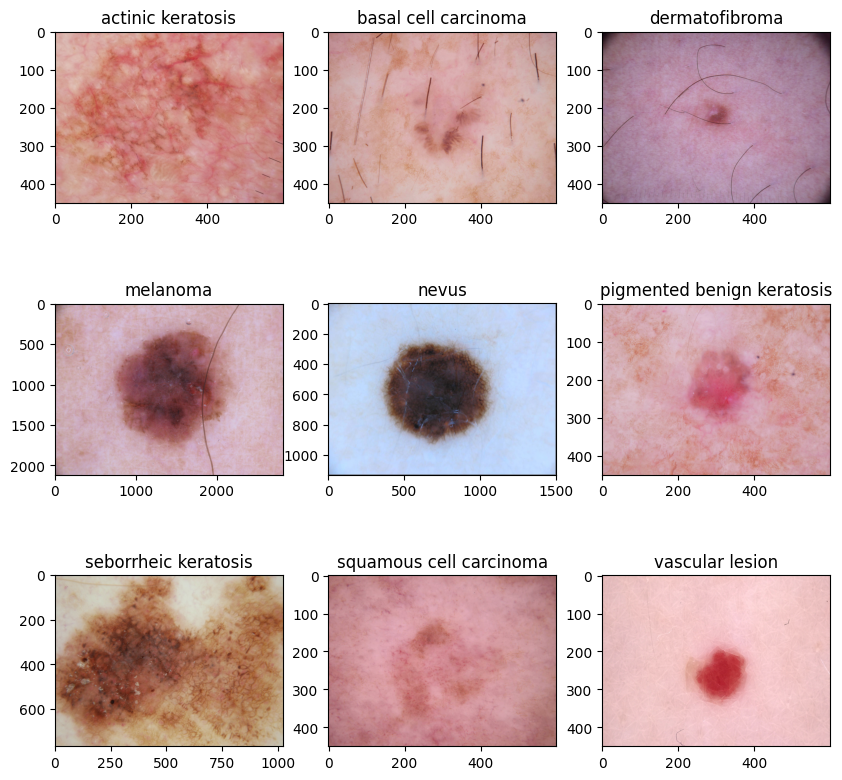

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.rglob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


#Create the model


In [11]:

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Compile the model

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

## Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 254s 945ms/step - loss: 2.0580 - accuracy: 0.1936 - val_loss: 2.0227 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0286 - accuracy: 0.1942 - val_loss: 2.0295 - val_accuracy: 0.2796
Epoch 3/20
56/56 [==============================] - 5s 89ms/step - loss: 1.9883 - accuracy: 0.2411 - val_loss: 1.8845 - val_accuracy: 0.3177
Epoch 4/20
56/56 [==============================] - 5s 91ms/step - loss: 1.8879 - accuracy: 0.2941 - val_loss: 1.8088 - val_accuracy: 0.3244
Epoch 5/20
56/56 [==============================] - 5s 91ms/step - loss: 1.7633 - accuracy: 0.3393 - val_loss: 1.6643 - val_accuracy: 0.4183
Epoch 6/20
56/56 [==============================] - 5s 92ms/step - loss: 1.6222 - accuracy: 0.4174 - val_loss: 1.6246 - val_accuracy: 0.4385
Epoch 7/20
56/56 [==============================] - 5s 91ms/step - loss: 1.5673 - accuracy: 0.4420 - val_loss: 1.5677 - val_accuracy: 0.4385
Epoch 8/20
56/56 [===

##Visualizing training results

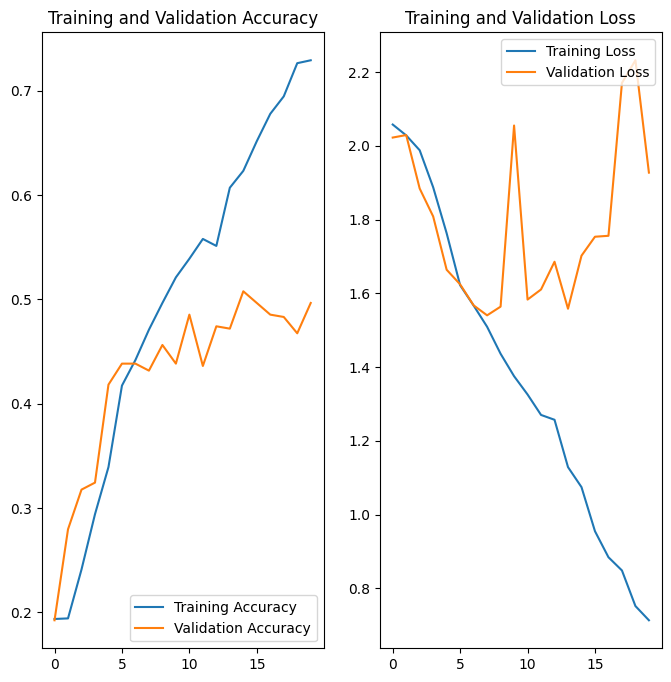

In [15]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Findings
Difference in loss functions in training and test around 6-8 epoch.Model is overfitting
The accuracy is just around 70% because there are enough features to remember the pattern.

##Data augmentation

In [16]:
#Data Augumentation
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

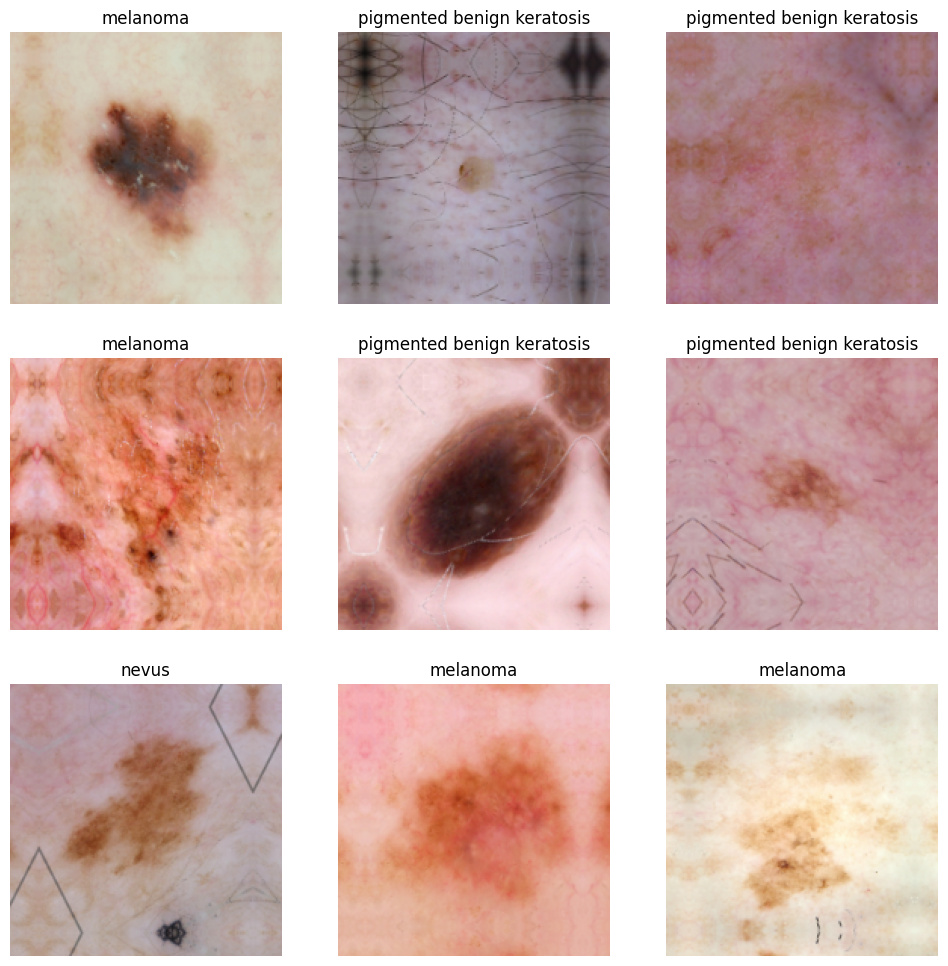

In [17]:
#Visualize

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##Create ,compile and train the model

In [18]:

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


In [20]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
##train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 127ms/step - loss: 2.0501 - accuracy: 0.2165 - val_loss: 2.0212 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 6s 106ms/step - loss: 2.0361 - accuracy: 0.2227 - val_loss: 1.9525 - val_accuracy: 0.2752
Epoch 3/20
56/56 [==============================] - 6s 106ms/step - loss: 1.8995 - accuracy: 0.2807 - val_loss: 1.9026 - val_accuracy: 0.3356
Epoch 4/20
56/56 [==============================] - 6s 108ms/step - loss: 1.8219 - accuracy: 0.3170 - val_loss: 1.8960 - val_accuracy: 0.3221
Epoch 5/20
56/56 [==============================] - 6s 106ms/step - loss: 1.7460 - accuracy: 0.3610 - val_loss: 1.8198 - val_accuracy: 0.3333
Epoch 6/20
56/56 [==============================] - 6s 106ms/step - loss: 1.6797 - accuracy: 0.3795 - val_loss: 1.6701 - val_accuracy: 0.4072
Epoch 7/20
56/56 [==============================] - 6s 105ms/step - loss: 1.6554 - accuracy: 0.3945 - val_loss: 1.6295 - val_accuracy: 0.4049
Epoch

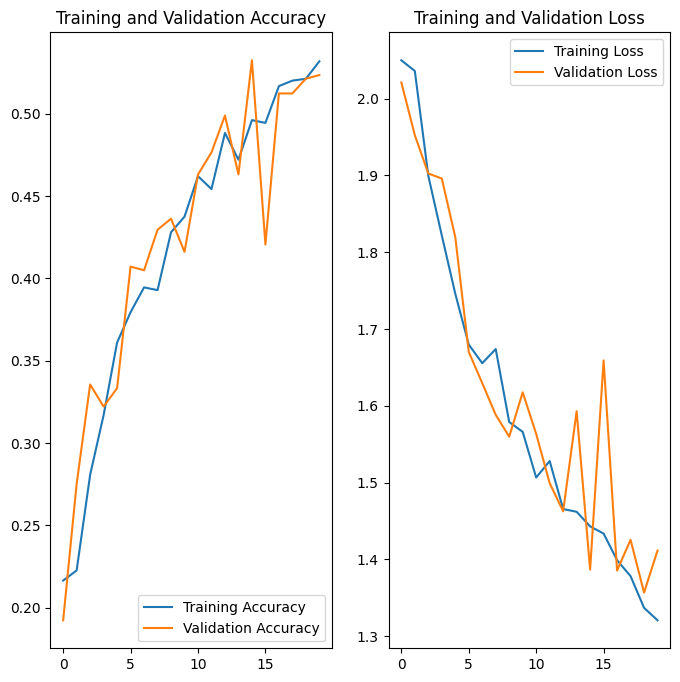

In [22]:
#Visualize the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Observations
Accuracy remains same but we have solved problem of overfitting

##Class distribution: Examine the current class distribution in the training dataset

In [23]:

path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion
2235,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion
2236,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion
2237,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion


In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion
2235,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion
2236,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion
2237,/content/drive/MyDrive/Skin_cancer/Train/vascu...,vascular lesion


<BarContainer object of 9 artists>

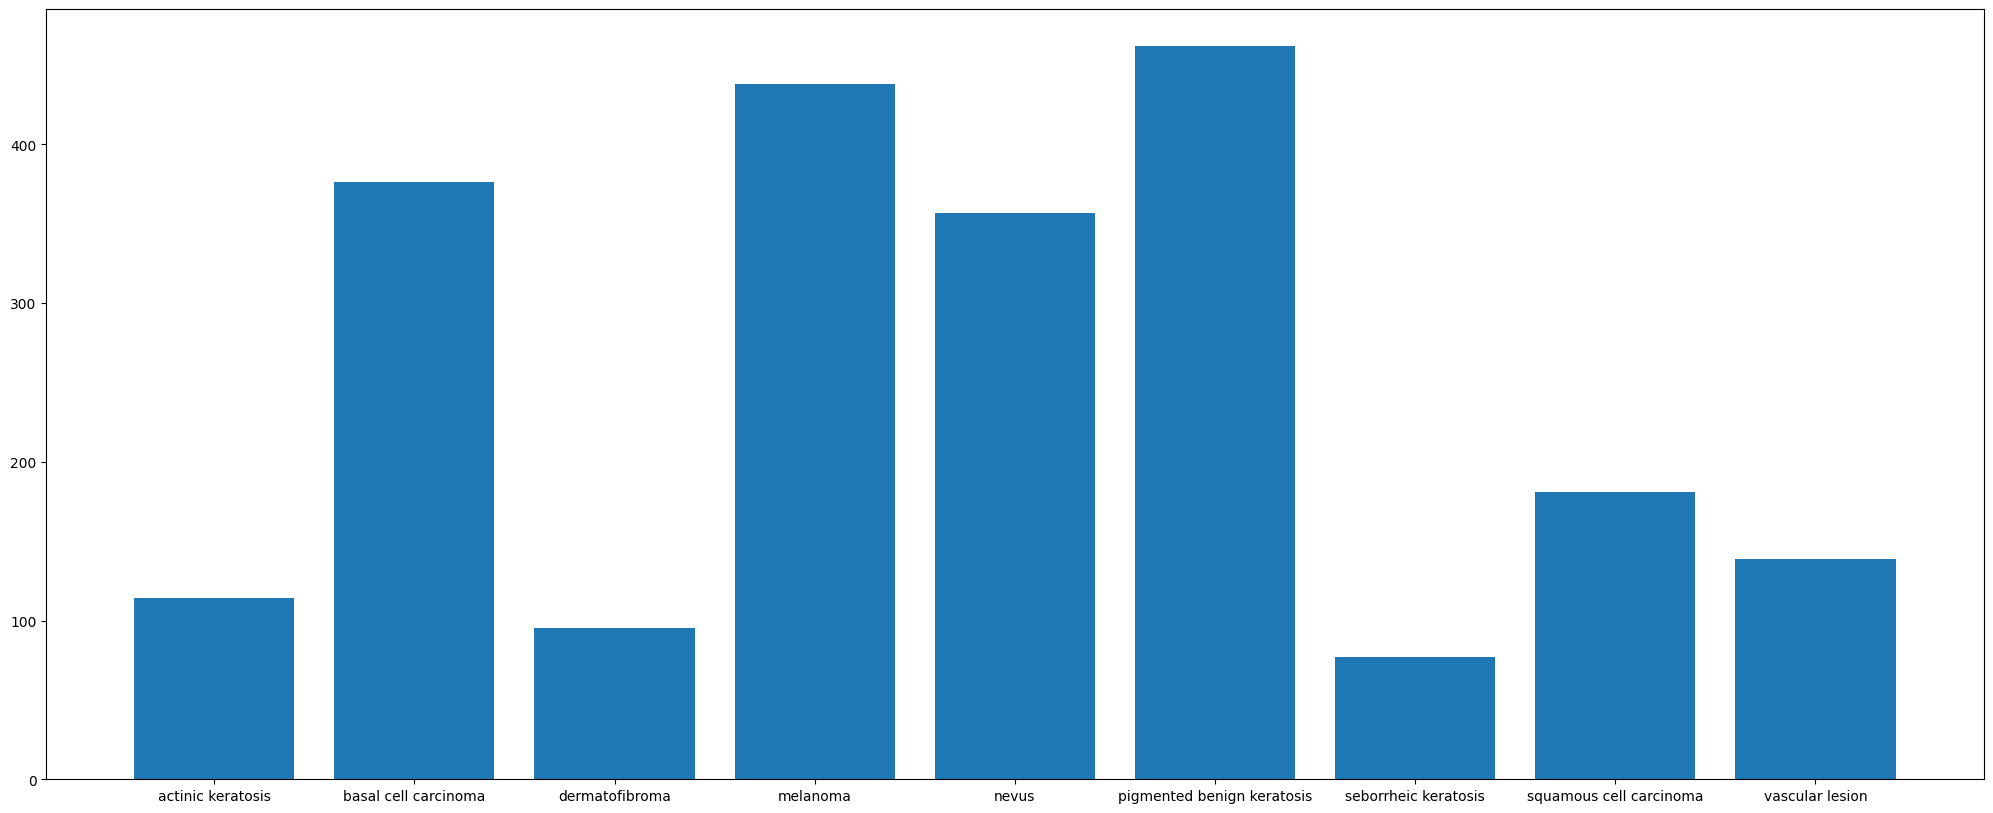

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


**Which class has the least number of samples**?-- squamous cell carcinoma has least number of samples

**Which classes dominate the data in terms proportionate number of samples**?- actinic keratosis and dermatofibroma have proportionate number of classes.
melanoma and pigmented benign keratosis have proprtionate number of classes

In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

**Handling class imbalances**

In [27]:
!pip install Augmentor


In [28]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Skin_cancer/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DD8F824FF40>: 100%|██████████| 500/500 [00:43<00:00, 11.44 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DD8F83CF310>: 100%|██████████| 500/500 [00:31<00:00, 15.92 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD877F70100>: 100%|██████████| 500/500 [00:39<00:00, 12.75 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD88414E320>: 100%|██████████| 500/500 [00:39<00:00, 12.67 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD8F824C820>: 100%|██████████| 500/500 [00:38<00:00, 12.96 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD877F02CB0>: 100%|██████████| 500/500 [00:43<00:00, 11.41 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7DD8F80DA1D0>: 100%|██████████| 500/500 [00:45<00:00, 11.02 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD877C45E70>: 100%|██████████| 500/500 [00:47<00:00, 10.59 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Skin_cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DD8F839A8F0>: 100%|██████████| 500/500 [00:40<00:00, 12.49 Samples/s]


In [29]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Skin_cancer/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [43]:

for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion
6735,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion
6736,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion
6737,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
new_df['Label'].value_counts()


pigmented benign keratosis    1376
melanoma                      1328
basal cell carcinoma          1173
nevus                         1053
squamous cell carcinoma        565
vascular lesion                424
actinic keratosis              329
dermatofibroma                 269
seborrheic keratosis           222
Name: Label, dtype: int64

## Model Building & training on the rectified class imbalance data :


In [45]:
batch_size = 32
img_height = 180
img_width = 180

In [46]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection /Train/output")

data_dir_train1=pathlib.Path("/content/drive/MyDrive/Skin_cancer/Train")

In [47]:
data_dir_train1


PosixPath('/content/drive/MyDrive/Skin_cancer/Train')

Create a training dataset

In [48]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [36]:
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Skin_cancer/Train/actin...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion
6735,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion
6736,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion
6737,/content/drive/MyDrive/Skin_cancer/Train/outpu...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
new_df['Label'].value_counts()


pigmented benign keratosis    1376
melanoma                      1328
basal cell carcinoma          1173
nevus                         1053
squamous cell carcinoma        565
vascular lesion                424
actinic keratosis              329
dermatofibroma                 269
seborrheic keratosis           222
Name: Label, dtype: int64


Todo: Train the model on the data created using Augmentor


In [38]:
batch_size = 32
img_height = 180
img_width = 180


In [59]:
import pathlib
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Skin_cancer/Train/output")

In [60]:
image_count_train1 = len(list(data_dir_train1.rglob('*/*.jpg')))
print(image_count_train1)

4500


In [62]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




data_dir_train1=pathlib.Path("/content/drive/MyDrive/Skin_cancer/Train/output")
class_names = [item.name for item in data_dir_train1.glob('*') if item.is_dir()]

# Remove 'output' from class names if present
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [63]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [ ]:
#Create model

In [64]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [65]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [66]:
epochs =30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 31s 250ms/step - loss: 1.9897 - accuracy: 0.2481 - val_loss: 1.8889 - val_accuracy: 0.3156
Epoch 2/30
113/113 [==============================] - 28s 237ms/step - loss: 1.8305 - accuracy: 0.3278 - val_loss: 1.7564 - val_accuracy: 0.3644
Epoch 3/30
113/113 [==============================] - 27s 225ms/step - loss: 1.6164 - accuracy: 0.4172 - val_loss: 1.8499 - val_accuracy: 0.3144
Epoch 4/30
113/113 [==============================] - 26s 219ms/step - loss: 1.4945 - accuracy: 0.4603 - val_loss: 1.4485 - val_accuracy: 0.4800
Epoch 5/30
113/113 [==============================] - 26s 220ms/step - loss: 1.7611 - accuracy: 0.3689 - val_loss: 1.5655 - val_accuracy: 0.4333
Epoch 6/30
113/113 [==============================] - 26s 217ms/step - loss: 1.4276 - accuracy: 0.4839 - val_loss: 1.4065 - val_accuracy: 0.4911
Epoch 7/30
113/113 [==============================] - 27s 228ms/step - loss: 1.2810 - accuracy: 0.5556 - val_loss: 1.3552 - val_ac

##Visualize the model results

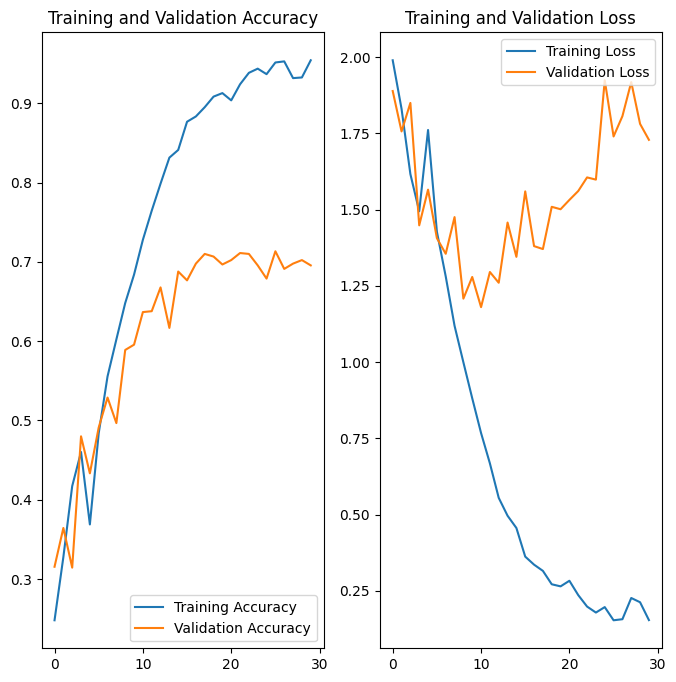

In [67]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()